In [1]:
import numpy as np
import pandas as pd
import seaborn as sns;sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import statsmodels.api as sm
import math
from math import sqrt

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import make_column_transformer

from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix, classification_report, auc
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, KFold

from sklearn import tree
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image

from sklearn import neighbors
import itertools
import plotly.express as px

from itertools import chain
from matplotlib.pyplot import figure

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, TransformerMixin

from pprint import pprint
from time import time
import logging

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet as wn
from nltk import word_tokenize, pos_tag
from collections import defaultdict
#nltk.download('averaged_perceptron_tagger')

from collections import Counter
import re
import string

from gensim.parsing.preprocessing import remove_stopwords
from gensim.parsing.preprocessing import STOPWORDS

from textblob import TextBlob

from sklearn.pipeline import Pipeline

pd.set_option('display.float_format', lambda x: '%.5f' % x)


In [2]:
df=pd.read_csv('train.txt',delimiter=";",header=None,names=['corpus','feeling'])

In [3]:
df

,corpus,feeling
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


### Data Cleaning

In [4]:
# Agrego un diccionario con contracciones y sus extensiones respectivas
contractions = { 
"ain't": "am not",
"aren't": "am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"i'd": "I had",
"i'd've": "I would have",
"i'll": "I will",
"i'll've": "I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that had",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there had",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [5]:
#Agrego las mismas palabras de las stop words pero sin apostrofes (ej: haven't, agrego havent)
stop_words=stopwords.words('english');

hifen =' '.join(stop_words)
hifen = re.sub("'", '', hifen)    
hifen=word_tokenize(hifen)

stop_words.extend(hifen)
stop_words.append('shall')
stop_words.append('im')

### ESTO SI FUNCIONA

In [6]:
def clean_text(text):
    '''Remove unwanted characters, stopwords, and format the text to create fewer nulls word embeddings'''
    
    # Convert words to lower case
    text = text.lower()
    
    # Replace contractions with their longer forms 
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
    
    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    
    # remove stop words
    #if remove_stopwords:
    text = text.split()
    stops = stop_words
    text = [w for w in text if not w in stops]
    text = " ".join(text)
        
    # spelling correction (tarda demasiado y no da buenos resultados)
    #text = TextBlob(text).correct() 
    #text = text.__str__() # opcion 1 (tarda demasiado)
    #text = '{}'.format(text) #opcion2 (tarda demasiado)
    #text = str(TextBlob(text).correct()) #opcion3 (tarda demasiado)
    
    #Lemmatize 
    
    #Defaultdict is a container like dictionaries present in the module collections. 
    #Defaultdict is a sub-class of the dictionary class that returns a dictionary-like object. 
    #The functionality of both dictionaries and defaultdict are almost same except for the fact that defaultdict never raises a KeyError. 
    #It provides a default value for the key that does not exists.

    tag_map = defaultdict(lambda : wn.NOUN)
    tag_map['J'] = wn.ADJ
    tag_map['V'] = wn.VERB
    tag_map['R'] = wn.ADV

    tokens = word_tokenize(text)
    lmtzr = WordNetLemmatizer()
    
    new_text2=[]
    
    for token, tag in pos_tag(tokens):
        lemma = lmtzr.lemmatize(token, tag_map[tag[0]])
        new_text2.append(lemma)
        text=" ".join(new_text2)
        
    return text

clean_lambda = lambda x: clean_text(x)

In [7]:
df_test=pd.read_csv('test.txt',delimiter=";",header=None,names=['corpus','feeling'])

In [8]:
df_test['clean_corpus'] = df_test.corpus.apply(clean_lambda)

### ESTO NO FUNCIONA
1. La clase va a recibir un objeto series para entrenar, pero para predecir lo ideal sería que pueda hacerlo con un string. 

In [203]:
class clean_texto(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
        
    @staticmethod
    def clean_text(text):
        '''Remove unwanted characters, stopwords, and format the text to create fewer nulls word embeddings'''

        # Convert words to lower case
        text = text.lower()

        # Replace contractions with their longer forms 
        if True:
            text = text.split()
            new_text = []
            for word in text:
                if word in contractions:
                    new_text.append(contractions[word])
                else:
                    new_text.append(word)
            text = " ".join(new_text)

        # Format words and remove unwanted characters
        text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
        text = re.sub(r'\<a href', ' ', text)
        text = re.sub(r'&amp;', '', text) 
        text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
        text = re.sub(r'<br />', ' ', text)
        text = re.sub(r'\'', ' ', text)

        # remove stop words
        #if remove_stopwords:
        text = text.split()
        stops = stop_words
        text = [w for w in text if not w in stops]
        text = " ".join(text)

        # spelling correction (tarda demasiado y no da buenos resultados)
        #text = TextBlob(text).correct() 
        #text = text.__str__() # opcion 1 (tarda demasiado)
        #text = '{}'.format(text) #opcion2 (tarda demasiado)
        #text = str(TextBlob(text).correct()) #opcion3 (tarda demasiado)

        #Lemmatize 

        #Defaultdict is a container like dictionaries present in the module collections. 
        #Defaultdict is a sub-class of the dictionary class that returns a dictionary-like object. 
        #The functionality of both dictionaries and defaultdict are almost same except for the fact that defaultdict never raises a KeyError. 
        #It provides a default value for the key that does not exists.

        tag_map = defaultdict(lambda : wn.NOUN)
        tag_map['J'] = wn.ADJ
        tag_map['V'] = wn.VERB
        tag_map['R'] = wn.ADV

        tokens = word_tokenize(text)
        lmtzr = WordNetLemmatizer()

        new_text2=[]

        for token, tag in pos_tag(tokens):
            lemma = lmtzr.lemmatize(token, tag_map[tag[0]])
            new_text2.append(lemma)
            text=" ".join(new_text2)

        return text
    
    def fit(self, texto, y=None):
        return self

    def transform(self, texto):
        if isinstance(texto, pd.Series):
            texto=texto.apply(lambda x: self.clean_text(x))
        else:
            texto=pd.Series(texto)
            texto=texto.apply(lambda x: self.clean_text(x))
            
        return texto

In [204]:
parameters_vect = {
    #"max_df": (0.5),
    "strip_accents": ('unicode'), 
    "stop_words": (stop_words),
    'max_features': (5000),
    "ngram_range": (1, 2),  
    'use_idf': (True),
    'sublinear_tf': (True),
    'norm': ('l1')
}

parameters_clf ={
    "alpha": (1.0),
    "fit_prior": (False)
}


pasos = [('clean_texto',clean_texto()),
         ("vect", TfidfVectorizer(**parameters_vect)),
         ("clf", MultinomialNB(**parameters_clf))]

pipeline_prueba=Pipeline(pasos)

In [205]:
pipeline_prueba.fit(df.corpus, df.feeling)

Pipeline(steps=[('clean_texto', clean_texto()),
                ('vect',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2),
                                 norm='l1',
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 strip_accents='unicode', sublinear_tf=True)),
                ('clf', MultinomialNB(fit_prior=False))])

In [206]:
X_test_mnb=df_test['clean_corpus']

In [207]:
y_test_mnb=df_test['feeling']

In [208]:
clases=list(df.feeling.unique())
clases=sorted(clases)
clases

['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']

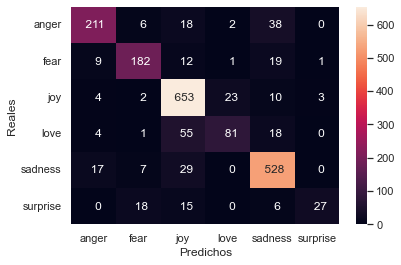

              precision    recall  f1-score   support

       anger     0.8612    0.7673    0.8115       275
        fear     0.8426    0.8125    0.8273       224
         joy     0.8350    0.9396    0.8842       695
        love     0.7570    0.5094    0.6090       159
     sadness     0.8530    0.9088    0.8800       581
    surprise     0.8710    0.4091    0.5567        66

    accuracy                         0.8410      2000
   macro avg     0.8366    0.7244    0.7615      2000
weighted avg     0.8397    0.8410    0.8339      2000



In [209]:
# Calculamos las predicciones y métricas sobre la data de prueba

predicciones=pipeline_prueba.predict(X_test_mnb)
sns.heatmap(confusion_matrix(y_test_mnb, predicciones), annot=True, fmt='4d',xticklabels=clases, yticklabels=clases)
plt.xlabel('Predichos')
plt.ylabel('Reales')
plt.show()
print(classification_report(y_test_mnb, predicciones, digits=4))

In [210]:
pipeline_prueba.predict("Hello I'm happy")

array(['joy'], dtype='<U8')

In [81]:
textito=df.corpus.str.split()

In [82]:
            new_text = []        
            for word in textito:
                for element in word:
                    if element in contractions:
                        new_text.append(contractions[element])
                    else:
                        new_text.append(element)
            text = " ".join(new_text)
            
            text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
            
            text = text.split()
            stops = stop_words
            text = [w for w in text if not w in stops]
            text = " ".join(text)
            
            text=[text]
           

In [83]:
text

In [ ]:
class clean_texto(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
        
    @staticmethod
    def _clean_text(x):
        '''Remove unwanted characters, stopwords, and format the text to create fewer nulls word embeddings'''

        # Convert words to lower case
        text = text.lower()

        # Replace contractions with their longer forms 
        if True:
            text = text.split()
            new_text = []
            for word in text:
                if word in contractions:
                    new_text.append(contractions[word])
                else:
                    new_text.append(word)
            text = " ".join(new_text)
        
'''
        # Format words and remove unwanted characters
        text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
        text = re.sub(r'\<a href', ' ', text)
        text = re.sub(r'&amp;', '', text) 
        text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
        text = re.sub(r'<br />', ' ', text)
        text = re.sub(r'\'', ' ', text)

        # remove stop words
        #if remove_stopwords:
        text = text.split()
        stops = stop_words
        text = [w for w in text if not w in stops]
        text = " ".join(text)

        # spelling correction (tarda demasiado y no da buenos resultados)
        #text = TextBlob(text).correct() 
        #text = text.__str__() # opcion 1 (tarda demasiado)
        #text = '{}'.format(text) #opcion2 (tarda demasiado)
        #text = str(TextBlob(text).correct()) #opcion3 (tarda demasiado)

        #Lemmatize 

        #Defaultdict is a container like dictionaries present in the module collections. 
        #Defaultdict is a sub-class of the dictionary class that returns a dictionary-like object. 
        #The functionality of both dictionaries and defaultdict are almost same except for the fact that defaultdict never raises a KeyError. 
        #It provides a default value for the key that does not exists.

        tag_map = defaultdict(lambda : wn.NOUN)
        tag_map['J'] = wn.ADJ
        tag_map['V'] = wn.VERB
        tag_map['R'] = wn.ADV

        tokens = word_tokenize(text)
        lmtzr = WordNetLemmatizer()

        new_text2=[]

        for token, tag in pos_tag(tokens):
            lemma = lmtzr.lemmatize(token, tag_map[tag[0]])
            new_text2.append(lemma)
            text=" ".join(new_text2)
'''
        return text
        
    def fit(self, text, y=None):
        return self
    
    def transform(self, text, y=None):
        return text.apply(lambda x:_clean_text(x))